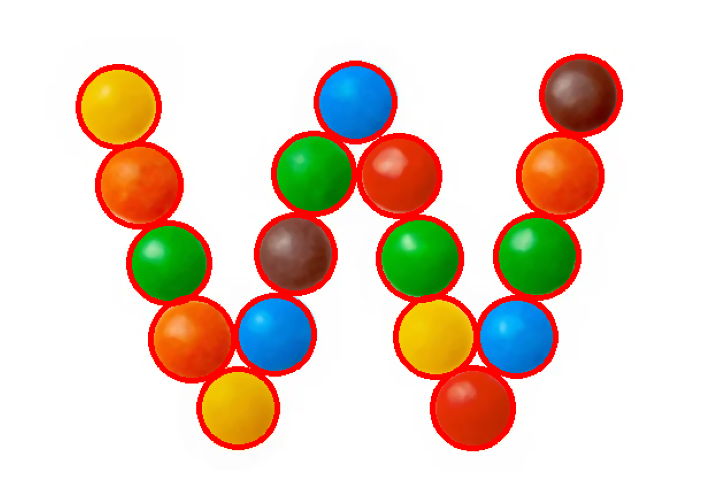

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('smarties.jpg')

img = cv2.medianBlur(img, 5)
img_copy = img.copy()

img_gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)

circles = cv2.HoughCircles(img_gray, cv2.HOUGH_GRADIENT, 1, 20,param1=60, param2=40, minRadius=5, maxRadius=50)
circles = np.uint16(np.around(circles))

for i in circles[0, :]:
    cv2.circle(img, (i[0], i[1]), i[2], (0, 0, 255), 4)


img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 6))
plt.imshow(img_rgb)
plt.axis('off') 
plt.show()
